In [1]:
import yfinance as yf

df = yf.download('SPY')
print(df.head())

C:\Users\Ferna\AppData\Local\Temp\ipykernel_19036\2231470556.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('SPY')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.452524  24.469916  24.348175  24.469916  1003200
1993-02-01  24.626434  24.626434  24.469910  24.469910   480500
1993-02-02  24.678598  24.695990  24.556858  24.609032   201300
1993-02-03  24.939484  24.956875  24.696002  24.713393   529400
1993-02-04  25.043831  25.096006  24.748175  25.026439   531500


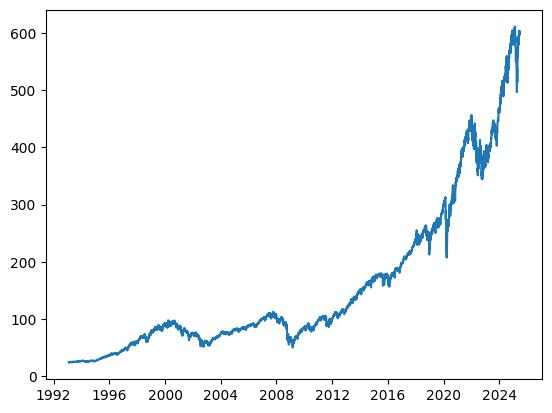

In [2]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

In [3]:
df['MA'] = df['Close'].rolling(50).mean()
df

Price,Close,High,Low,Open,Volume,MA
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.452524,24.469916,24.348175,24.469916,1003200,NaN
1993-02-01,24.626434,24.626434,24.469910,24.469910,480500,NaN
1993-02-02,24.678598,24.695990,24.556858,24.609032,201300,NaN
1993-02-03,24.939484,24.956875,24.696002,24.713393,529400,NaN
1993-02-04,25.043831,25.096006,24.748175,25.026439,531500,NaN
...,...,...,...,...,...,...
2025-06-11,601.359985,605.059998,599.270020,604.190002,73658200,563.803000
2025-06-12,603.750000,603.750000,599.520020,600.010010,64129000,564.658601


C:\Users\Ferna\AppData\Local\Temp\ipykernel_19036\4143804274.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close vs Moving Average')

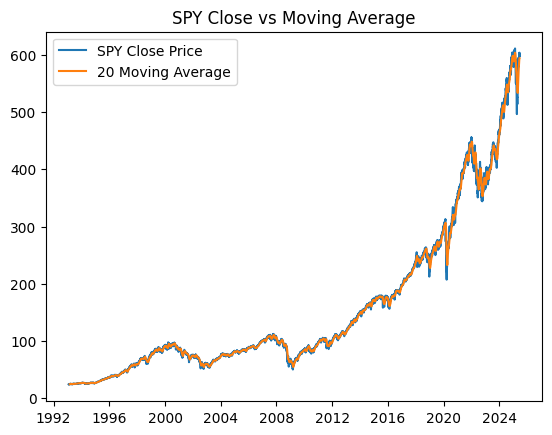

In [6]:
TICKER = 'SPY'
WINDOW = 20

df = yf.download(TICKER)
df['MA'] = df['Close'].rolling(WINDOW).mean()

#df = df.iloc[-100:, :]

plt.plot(df['Close'])
plt.plot(df['MA'])
plt.legend([f'{TICKER} Close Price', f'{WINDOW} Moving Average'])
plt.title(f'{TICKER} Close vs Moving Average')

Now that we got our relevant data and we have an indicator (in this case the moving average), we are going to define a trading strategy that is going to help us know when we want to enter or exit a specific position. Finally, we are going to test it.

The goal is to be able to make a strategy that outperforms the S&P500

In [24]:
import numpy as np
df.columns = df.columns.get_level_values(0) # Get rid of multi-index

def add_ma_strategy(df):

    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)

    return df

df = add_ma_strategy(df)

df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1 # Cumulative asset return over time
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1 # Cumulative strategy return over time
# shift is essential to ensure the model reflects a realistic trading scenario. 
# It applies the signal (1 or -1) one day after it is generated, 
# simulating the delay between receiving a signal and being able to execute a trade based on it.


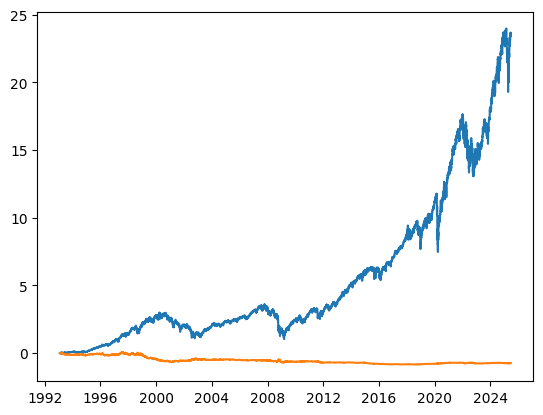

In [25]:
plt.plot(df['asset_cumulative'])
plt.plot(df['strategy_cumulative'])

Let's put all of what we have done into 3 functions: Get data, add strategy and test strategy. Then we can create our main function

C:\Users\Ferna\AppData\Local\Temp\ipykernel_19036\4103663438.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-02-26,24.713394,24.730786,24.591653,24.730786,66200,24.639476,NaN,NaN,NaN
1993-03-01,24.643831,24.800355,24.609048,24.800355,66500,24.649042,1.0,-0.002815,-0.002815
1993-03-02,25.009043,25.009043,24.626429,24.661212,182400,24.668173,-1.0,0.011963,-0.017593
1993-03-03,25.113405,25.130797,25.009056,25.043839,280100,24.689913,1.0,0.016186,-0.013493
1993-03-04,24.974262,25.148178,24.974262,25.148178,89500,24.691652,1.0,0.010556,-0.018959
...,...,...,...,...,...,...,...,...,...
2025-06-11,601.359985,605.059998,599.270020,604.190002,73658200,592.218503,1.0,23.333363,-0.728360
2025-06-12,603.750000,603.750000,599.520020,600.010010,64129000,593.026501,1.0,23.430072,-0.727280
2025-06-13,597.000000,601.849976,595.479980,598.500000,89506000,593.353500,1.0,23.156941,-0.730329


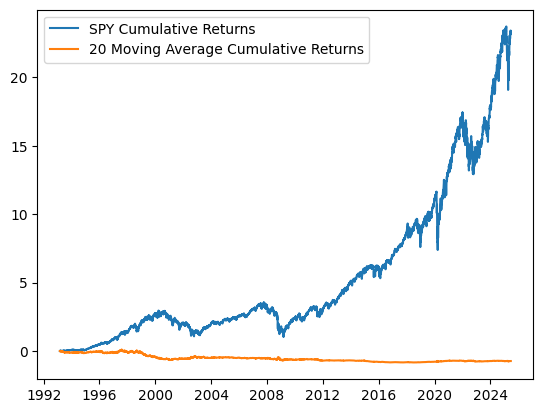

In [62]:
TICKER = 'SPY'
WINDOW = 20

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()

def add_strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df


def test_strategy(df):
    df['asset_cumulative'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_cumulative'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()